In [1]:
##se importan las librerias
##imports
##numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#cross validation
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFol


ImportError: cannot import name 'StratifiedKFol' from 'sklearn.model_selection' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [2]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [3]:
from sklearn.model_selection import StratifiedKFold

In [4]:
##cargar datos
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
##cargar datos para trabajar los cambios
#data
newData = pd.read_csv('default of credit card clients.csv', header=1)
newData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [7]:
##pasar a categoria variables necesarias
newData["SEX"]= newData["SEX"].astype("category")
newData["EDUCATION"]= newData["EDUCATION"].astype("category")
newData["MARRIAGE"]= newData["MARRIAGE"].astype("category")
newData["AGE"]= newData["AGE"].astype("category")
newData["PAY_0"]= newData["PAY_0"].astype("category")
newData["PAY_2"]= newData["PAY_0"].astype("category")
newData["PAY_3"]= newData["PAY_0"].astype("category")
newData["PAY_4"]= newData["PAY_0"].astype("category")
newData["PAY_5"]= newData["PAY_0"].astype("category")
newData["PAY_6"]= newData["PAY_0"].astype("category")
newData["default payment next month"]= newData["default payment next month"].astype("category")

In [8]:
#unificacion de otros en EDUCACION en categoria 4
newData["EDUCATION"]= np.where(newData["EDUCATION"] == 0, 4, newData["EDUCATION"])
newData["EDUCATION"]= np.where(newData["EDUCATION"] == 5, 4, newData["EDUCATION"])
newData["EDUCATION"]= np.where(newData["EDUCATION"] == 6, 4, newData["EDUCATION"])
newData["EDUCATION"].unique()

array([2, 1, 3, 4], dtype=int64)

In [9]:
##Se hace el dataset para aplicar dummy
dummyData=newData.iloc[ : ,1:24]
dummyData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,2,2,2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,-1,-1,-1,-1,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,-1,-1,-1,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [10]:
##aplicar dummy a los datos sin la variable dependiente
dummyData = pd.get_dummies(dummyData)
dummyData.head()

,LIMIT_BAL,EDUCATION,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,2,3913,3102,689,0,0,0,0,689,...,0,0,0,1,0,0,0,0,0,0
1,120000,2,2682,1725,2682,3272,3455,3261,0,1000,...,1,0,0,0,0,0,0,0,0,0
2,90000,2,29239,14027,13559,14331,14948,15549,1518,1500,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,46990,48233,49291,28314,28959,29547,2000,2019,...,0,1,0,0,0,0,0,0,0,0
4,50000,2,8617,5670,35835,20940,19146,19131,2000,36681,...,1,0,0,0,0,0,0,0,0,0


In [11]:
dummyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 142 entries, LIMIT_BAL to PAY_6_8
dtypes: int64(14), uint8(128)
memory usage: 6.9 MB


In [12]:
##ya que son muchas columnas se tansforman los valores de los pay para que sean menos
##Los valores que son mas de 4, se unifican en el 4 para que sean valores de no consumo por mas de 4 meses
#para Pay 0
newData["PAY_0"]= np.where(newData["PAY_0"] == 5, 4, newData["PAY_0"])
newData["PAY_0"]= np.where(newData["PAY_0"] == 6, 4, newData["PAY_0"])
newData["PAY_0"]= np.where(newData["PAY_0"] == 7, 4, newData["PAY_0"])
newData["PAY_0"]= np.where(newData["PAY_0"] == 8, 4, newData["PAY_0"])
newData["PAY_0"]= np.where(newData["PAY_0"] == 9, 4, newData["PAY_0"])

#para pay 2
newData["PAY_2"]= np.where(newData["PAY_2"] == 5, 4, newData["PAY_2"])
newData["PAY_2"]= np.where(newData["PAY_2"] == 6, 4, newData["PAY_2"])
newData["PAY_2"]= np.where(newData["PAY_2"] == 7, 4, newData["PAY_2"])
newData["PAY_2"]= np.where(newData["PAY_2"] == 8, 4, newData["PAY_2"])
newData["PAY_2"]= np.where(newData["PAY_2"] == 9, 4, newData["PAY_2"])

#para pay 3
newData["PAY_3"]= np.where(newData["PAY_3"] == 5, 4, newData["PAY_3"])
newData["PAY_3"]= np.where(newData["PAY_3"] == 6, 4, newData["PAY_3"])
newData["PAY_3"]= np.where(newData["PAY_3"] == 7, 4, newData["PAY_3"])
newData["PAY_3"]= np.where(newData["PAY_3"] == 8, 4, newData["PAY_3"])
newData["PAY_3"]= np.where(newData["PAY_3"] == 9, 4, newData["PAY_3"])

#para pay 4
newData["PAY_4"]= np.where(newData["PAY_4"] == 5, 4, newData["PAY_4"])
newData["PAY_4"]= np.where(newData["PAY_4"] == 6, 4, newData["PAY_4"])
newData["PAY_4"]= np.where(newData["PAY_4"] == 7, 4, newData["PAY_4"])
newData["PAY_4"]= np.where(newData["PAY_4"] == 8, 4, newData["PAY_4"])
newData["PAY_4"]= np.where(newData["PAY_4"] == 9, 4, newData["PAY_4"])

In [13]:
#para pay 5
newData["PAY_5"]= np.where(newData["PAY_5"] == 5, 4, newData["PAY_5"])
newData["PAY_5"]= np.where(newData["PAY_5"] == 6, 4, newData["PAY_5"])
newData["PAY_5"]= np.where(newData["PAY_5"] == 7, 4, newData["PAY_5"])
newData["PAY_5"]= np.where(newData["PAY_5"] == 8, 4, newData["PAY_5"])
newData["PAY_5"]= np.where(newData["PAY_5"] == 9, 4, newData["PAY_5"])

#para pay 6
newData["PAY_6"]= np.where(newData["PAY_6"] == 5, 4, newData["PAY_6"])
newData["PAY_6"]= np.where(newData["PAY_6"] == 6, 4, newData["PAY_6"])
newData["PAY_6"]= np.where(newData["PAY_6"] == 7, 4, newData["PAY_6"])
newData["PAY_6"]= np.where(newData["PAY_6"] == 8, 4, newData["PAY_6"])
newData["PAY_6"]= np.where(newData["PAY_6"] == 9, 4, newData["PAY_6"])

In [14]:
#Se elimina la columna ID de new Data
newData = newData.drop(["ID"], axis=1)

In [15]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null category
AGE                           30000 non-null category
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1       

In [16]:
#Se vuelven a cambiar a categoria educacion y pay
newData["EDUCATION"]= newData["EDUCATION"].astype("category")
newData["AGE"]= newData["AGE"].astype("category")
newData["PAY_0"]= newData["PAY_0"].astype("category")
newData["PAY_2"]= newData["PAY_2"].astype("category")
newData["PAY_3"]= newData["PAY_3"].astype("category")
newData["PAY_4"]= newData["PAY_4"].astype("category")
newData["PAY_5"]= newData["PAY_5"].astype("category")
newData["PAY_6"]= newData["PAY_6"].astype("category")

In [17]:
##Se hace el dataset para aplicar dummy
dummyData=newData.iloc[ : ,0:23]
dummyData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,2,2,2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,-1,-1,-1,-1,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,-1,-1,-1,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [18]:
##Se aplica dummy
dummyData = pd.get_dummies(dummyData)
dummyData.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4
0,20000,3913,3102,689,0,0,0,0,689,0,...,1,0,0,0,0,0,0,1,0,0
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,...,0,0,0,0,1,0,0,0,0,0
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,...,0,0,0,0,0,1,0,0,0,0
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,...,0,0,0,0,0,1,0,0,0,0
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,...,0,0,0,0,1,0,0,0,0,0


In [19]:
dummyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 121 entries, LIMIT_BAL to PAY_6_4
dtypes: int64(13), uint8(108)
memory usage: 6.1 MB


In [20]:
dummyData.dtypes

LIMIT_BAL    int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
             ...  
PAY_6_0      uint8
PAY_6_1      uint8
PAY_6_2      uint8
PAY_6_3      uint8
PAY_6_4      uint8
Length: 121, dtype: object

In [21]:
##agregar la variable dependiente
dummyData["default payment next month"] = dummyData["default payment next month"]

KeyError: 'default payment next month'

In [22]:
##agregar la variable dependiente
dummyData["default payment next month"] = newData["default payment next month"]

In [23]:
dummyData.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,default payment next month
0,20000,3913,3102,689,0,0,0,0,689,0,...,0,0,0,0,0,0,1,0,0,1
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,...,0,0,0,1,0,0,0,0,0,1
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,...,0,0,0,0,1,0,0,0,0,0
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,...,0,0,0,0,1,0,0,0,0,0
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,...,0,0,0,1,0,0,0,0,0,0


In [24]:
#Matriz de correlación
corrMat = dummyData.corr()
print(corrMat)

           LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
LIMIT_BAL   1.000000   0.285430   0.278314   0.283236   0.293988   0.295562   
BILL_AMT1   0.285430   1.000000   0.951484   0.892279   0.860272   0.829779   
BILL_AMT2   0.278314   0.951484   1.000000   0.928326   0.892482   0.859778   
BILL_AMT3   0.283236   0.892279   0.928326   1.000000   0.923969   0.883910   
BILL_AMT4   0.293988   0.860272   0.892482   0.923969   1.000000   0.940134   
...              ...        ...        ...        ...        ...        ...   
PAY_6_0    -0.100115   0.362898   0.345969   0.317887   0.296272   0.282273   
PAY_6_1    -0.053926  -0.122382  -0.116521  -0.106641  -0.101359  -0.094428   
PAY_6_2    -0.134798   0.057969   0.066698   0.066884   0.074499   0.080108   
PAY_6_3    -0.068988  -0.018960  -0.017684  -0.017061  -0.016820  -0.015430   
PAY_6_4    -0.042767   0.030317   0.031178   0.029870   0.030933   0.032707   

           BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3 

In [25]:
covMat = dummyData.cov()
print(covMat)

              LIMIT_BAL     BILL_AMT1     BILL_AMT2     BILL_AMT3  \
LIMIT_BAL  1.683446e+10  2.727020e+09  2.570130e+09  2.548533e+09   
BILL_AMT1  2.727020e+09  5.422240e+09  4.986670e+09  4.556511e+09   
BILL_AMT2  2.570130e+09  4.986670e+09  5.065705e+09  4.582086e+09   
BILL_AMT3  2.548533e+09  4.556511e+09  4.582086e+09  4.809338e+09   
BILL_AMT4  2.453926e+09  4.075286e+09  4.086508e+09  4.122238e+09   
...                 ...           ...           ...           ...   
PAY_6_0   -6.493976e+03  1.335932e+04  1.231028e+04  1.102112e+04   
PAY_6_1   -2.297483e+03 -2.959128e+03 -2.723215e+03 -2.428423e+03   
PAY_6_2   -4.977656e+03  1.214852e+03  1.351053e+03  1.320106e+03   
PAY_6_3   -9.223625e+02 -1.438631e+02 -1.297004e+02 -1.219234e+02   
PAY_6_4   -3.795223e+02  1.526896e+02  1.517753e+02  1.416813e+02   

              BILL_AMT4     BILL_AMT5     BILL_AMT6      PAY_AMT1  \
LIMIT_BAL  2.453926e+09  2.331481e+09  2.243837e+09  4.195711e+08   
BILL_AMT1  4.075286e+09  3.714795

In [26]:
#Datos para normalizacion
featuresc = dummyData.iloc[:,0:121]
print('Summary of feature sample')
featuresc.head()

Summary of feature sample


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4
0,20000,3913,3102,689,0,0,0,0,689,0,...,1,0,0,0,0,0,0,1,0,0
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,...,0,0,0,0,1,0,0,0,0,0
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,...,0,0,0,0,0,1,0,0,0,0
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,...,0,0,0,0,0,1,0,0,0,0
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,...,0,0,0,0,1,0,0,0,0,0


In [27]:
#Variable dependiente
depVar = dummyData['default payment next month']

In [28]:
#Normalizar variables
featuresc = preprocessing.scale(featuresc)
print(featuresc)

NameError: name 'preprocessing' is not defined

In [29]:
#se importa la libreria
from sklearn import preprocessing

In [30]:
#Normalizar variables
featuresc = preprocessing.scale(featuresc)
print(featuresc)

[[-1.13672015e+00 -6.42501073e-01 -6.47399230e-01 ...  3.20134252e+00
  -1.04162314e-01 -6.87182240e-02]
 [-3.65980500e-01 -6.59218750e-01 -6.66746568e-01 ... -3.12368950e-01
  -1.04162314e-01 -6.87182240e-02]
 [-5.97202394e-01 -2.98559658e-01 -4.93899110e-01 ... -3.12368950e-01
  -1.04162314e-01 -6.87182240e-02]
 ...
 [-1.05964618e+00 -6.47227110e-01 -6.43830440e-01 ... -3.12368950e-01
  -1.04162314e-01  1.45521805e+01]
 [-6.74276359e-01 -7.17981859e-01  4.10269289e-01 ... -3.12368950e-01
  -1.04162314e-01 -6.87182240e-02]
 [-9.05498252e-01 -4.47388783e-02 -3.85085319e-03 ... -3.12368950e-01
  -1.04162314e-01 -6.87182240e-02]]


In [31]:
##se busca ayuda y se aplica eliminacion recursiva
RFC = RandomForestClassifier(random_state=101)


In [32]:
rfecv = RFECV(estimator = RFC, step = 1, cv=StratifiedKFold(10), scoring = 'accuracy')


In [33]:
rfecv.fit(featuresc,depVar)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [34]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 101


In [35]:
print(np.where(rfecv.support_ == False)[0])

[ 19  23  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  85
  86 113]


In [37]:
featuresc.drop(featuresc.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [38]:
featuresc.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [39]:
featuresc.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [40]:
import numpy as np

In [41]:
featuresc.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [42]:
featuresc.drop(featuresc.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [43]:
featuresc.drop([np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [44]:
featuresc = featuresc.drop([np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [45]:
print(featuresc)

[[-1.13672015e+00 -6.42501073e-01 -6.47399230e-01 ...  3.20134252e+00
  -1.04162314e-01 -6.87182240e-02]
 [-3.65980500e-01 -6.59218750e-01 -6.66746568e-01 ... -3.12368950e-01
  -1.04162314e-01 -6.87182240e-02]
 [-5.97202394e-01 -2.98559658e-01 -4.93899110e-01 ... -3.12368950e-01
  -1.04162314e-01 -6.87182240e-02]
 ...
 [-1.05964618e+00 -6.47227110e-01 -6.43830440e-01 ... -3.12368950e-01
  -1.04162314e-01  1.45521805e+01]
 [-6.74276359e-01 -7.17981859e-01  4.10269289e-01 ... -3.12368950e-01
  -1.04162314e-01 -6.87182240e-02]
 [-9.05498252e-01 -4.47388783e-02 -3.85085319e-03 ... -3.12368950e-01
  -1.04162314e-01 -6.87182240e-02]]


In [46]:
featuresc.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [48]:
#Largo del set de variables independientes
len(featuresc)


30000

In [49]:
features = dummyData.iloc[:,0:121]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4
0,20000,3913,3102,689,0,0,0,0,689,0,...,1,0,0,0,0,0,0,1,0,0
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,...,0,0,0,0,1,0,0,0,0,0
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,...,0,0,0,0,0,1,0,0,0,0
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,...,0,0,0,0,0,1,0,0,0,0
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,...,0,0,0,0,1,0,0,0,0,0


In [50]:
features = features.drop([np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

KeyError: '[(19, 23, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 85, 86, 113)] not found in axis'

In [51]:
##Elimino las de mayor covarianza
dummyData = dummyData.drop(["BILL_AMT1"], axis=1)

In [52]:
dummyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 121 entries, LIMIT_BAL to default payment next month
dtypes: category(1), int64(12), uint8(108)
memory usage: 5.9 MB


In [53]:
#Matriz de correlación
corrMat = newData.corr()
print(corrMat)

           LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
LIMIT_BAL   1.000000   0.285430   0.278314   0.283236   0.293988   0.295562   
BILL_AMT1   0.285430   1.000000   0.951484   0.892279   0.860272   0.829779   
BILL_AMT2   0.278314   0.951484   1.000000   0.928326   0.892482   0.859778   
BILL_AMT3   0.283236   0.892279   0.928326   1.000000   0.923969   0.883910   
BILL_AMT4   0.293988   0.860272   0.892482   0.923969   1.000000   0.940134   
BILL_AMT5   0.295562   0.829779   0.859778   0.883910   0.940134   1.000000   
BILL_AMT6   0.290389   0.802650   0.831594   0.853320   0.900941   0.946197   
PAY_AMT1    0.195236   0.140277   0.280365   0.244335   0.233012   0.217031   
PAY_AMT2    0.178408   0.099355   0.100851   0.316936   0.207564   0.181246   
PAY_AMT3    0.210167   0.156887   0.150718   0.130011   0.300023   0.252305   
PAY_AMT4    0.203242   0.158303   0.147398   0.143405   0.130191   0.293118   
PAY_AMT5    0.217202   0.167026   0.157957   0.17971

In [54]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null category
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null 

In [55]:
newData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,2,2,2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,-1,-1,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [56]:
##Se aplica dummy
dummyData = pd.get_dummies(newData)
dummyData.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,default payment next month_0,default payment next month_1
0,20000,3913,3102,689,0,0,0,0,689,0,...,0,0,0,0,0,1,0,0,0,1
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,...,0,0,1,0,0,0,0,0,0,1
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,...,0,0,0,1,0,0,0,0,1,0
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,...,0,0,0,1,0,0,0,0,1,0
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,...,0,0,1,0,0,0,0,0,1,0


In [57]:
#data
newData = pd.read_csv('default of credit card clients.csv', header=1)
newData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [59]:
#elimino ID
newData = newData.drop(["ID"], axis=1)

In [60]:
newData = newData.drop(["BILL_AMT1"], axis=1)

In [61]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                

In [62]:
##ya que son muchas columnas se tansforman los valores de los pay para que sean menos
##Los valores que son mas de 4, se unifican en el 4 para que sean valores de no consumo por mas de 4 meses
#para Pay 0
newData["PAY_0"]= np.where(newData["PAY_0"] == 5, 4, newData["PAY_0"])
newData["PAY_0"]= np.where(newData["PAY_0"] == 6, 4, newData["PAY_0"])
newData["PAY_0"]= np.where(newData["PAY_0"] == 7, 4, newData["PAY_0"])
newData["PAY_0"]= np.where(newData["PAY_0"] == 8, 4, newData["PAY_0"])
newData["PAY_0"]= np.where(newData["PAY_0"] == 9, 4, newData["PAY_0"])

#para pay 2
newData["PAY_2"]= np.where(newData["PAY_2"] == 5, 4, newData["PAY_2"])
newData["PAY_2"]= np.where(newData["PAY_2"] == 6, 4, newData["PAY_2"])
newData["PAY_2"]= np.where(newData["PAY_2"] == 7, 4, newData["PAY_2"])
newData["PAY_2"]= np.where(newData["PAY_2"] == 8, 4, newData["PAY_2"])
newData["PAY_2"]= np.where(newData["PAY_2"] == 9, 4, newData["PAY_2"])

#para pay 3
newData["PAY_3"]= np.where(newData["PAY_3"] == 5, 4, newData["PAY_3"])
newData["PAY_3"]= np.where(newData["PAY_3"] == 6, 4, newData["PAY_3"])
newData["PAY_3"]= np.where(newData["PAY_3"] == 7, 4, newData["PAY_3"])
newData["PAY_3"]= np.where(newData["PAY_3"] == 8, 4, newData["PAY_3"])
newData["PAY_3"]= np.where(newData["PAY_3"] == 9, 4, newData["PAY_3"])

#para pay 4
newData["PAY_4"]= np.where(newData["PAY_4"] == 5, 4, newData["PAY_4"])
newData["PAY_4"]= np.where(newData["PAY_4"] == 6, 4, newData["PAY_4"])
newData["PAY_4"]= np.where(newData["PAY_4"] == 7, 4, newData["PAY_4"])
newData["PAY_4"]= np.where(newData["PAY_4"] == 8, 4, newData["PAY_4"])
newData["PAY_4"]= np.where(newData["PAY_4"] == 9, 4, newData["PAY_4"])
#para pay 5
newData["PAY_5"]= np.where(newData["PAY_5"] == 5, 4, newData["PAY_5"])
newData["PAY_5"]= np.where(newData["PAY_5"] == 6, 4, newData["PAY_5"])
newData["PAY_5"]= np.where(newData["PAY_5"] == 7, 4, newData["PAY_5"])
newData["PAY_5"]= np.where(newData["PAY_5"] == 8, 4, newData["PAY_5"])
newData["PAY_5"]= np.where(newData["PAY_5"] == 9, 4, newData["PAY_5"])

#para pay 6
newData["PAY_6"]= np.where(newData["PAY_6"] == 5, 4, newData["PAY_6"])
newData["PAY_6"]= np.where(newData["PAY_6"] == 6, 4, newData["PAY_6"])
newData["PAY_6"]= np.where(newData["PAY_6"] == 7, 4, newData["PAY_6"])
newData["PAY_6"]= np.where(newData["PAY_6"] == 8, 4, newData["PAY_6"])
newData["PAY_6"]= np.where(newData["PAY_6"] == 9, 4, newData["PAY_6"])


In [63]:
#Convertir a categoria
newData["SEX"]= newData["SEX"].astype("category")
newData["EDUCATION"]= newData["EDUCATION"].astype("category")
newData["MARRIAGE"]= newData["MARRIAGE"].astype("category")
newData["PAY_0"]= newData["PAY_0"].astype("category")
newData["PAY_2"]= newData["PAY_2"].astype("category")
newData["PAY_3"]= newData["PAY_3"].astype("category")
newData["PAY_4"]= newData["PAY_4"].astype("category")
newData["PAY_5"]= newData["PAY_5"].astype("category")
newData["PAY_6"]= newData["PAY_6"].astype("category")
newData["default payment next month"]= newData["default payment next month"].astype("category")

In [64]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int

In [65]:
dummyData = pd.get_dummies(newData.iloc[:,0:22])

SyntaxError: unexpected EOF while parsing (<ipython-input-65-c84beba132a7>, line 1)

In [66]:
dummyData = pd.get_dummies(newData.iloc[:,0:22])

In [67]:
dummyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 66 columns):
LIMIT_BAL      30000 non-null int64
AGE            30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
SEX_1          30000 non-null uint8
SEX_2          30000 non-null uint8
EDUCATION_0    30000 non-null uint8
EDUCATION_1    30000 non-null uint8
EDUCATION_2    30000 non-null uint8
EDUCATION_3    30000 non-null uint8
EDUCATION_4    30000 non-null uint8
EDUCATION_5    30000 non-null uint8
EDUCATION_6    30000 non-null uint8
MARRIAGE_0     30000 non-null uint8
MARRIAGE_1     30000 non-null uint8
MARRIAGE_2     30000 non-nu

In [69]:
newData["BILL_AMT1"] = rawData["BILL_AMT1"]

In [70]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int

In [73]:
#Agregar variable dependiente
dummyData = dummyData.join(newData.iloc[:,22])

In [74]:
dummyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 68 columns):
LIMIT_BAL                     30000 non-null int64
AGE                           30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
SEX_1                         30000 non-null uint8
SEX_2                         30000 non-null uint8
EDUCATION_0                   30000 non-null uint8
EDUCATION_1                   30000 non-null uint8
EDUCATION_2             

In [75]:
#Variables independientes
features = dummyData.iloc[:,0:66]
print('Summary of feature sample')
features.head()


Summary of feature sample


,LIMIT_BAL,AGE,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,BILL_AMT1
0,20000,24,3102,689,0,0,0,0,689,0,...,0,0,0,1,0,0,0,0,0,3913
1,120000,26,1725,2682,3272,3455,3261,0,1000,1000,...,0,0,0,0,0,0,1,0,0,2682
2,90000,34,14027,13559,14331,14948,15549,1518,1500,1000,...,0,0,0,0,0,1,0,0,0,29239
3,50000,37,48233,49291,28314,28959,29547,2000,2019,1200,...,0,0,0,0,0,1,0,0,0,46990
4,50000,57,5670,35835,20940,19146,19131,2000,36681,10000,...,0,0,0,0,0,1,0,0,0,8617


In [76]:
dummyData = dummyData.drop(["BILL_AMT1"], axis=1)

In [77]:
#Variables independientes
features = dummyData.iloc[:,0:66]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,AGE,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4
0,20000,24,3102,689,0,0,0,0,689,0,...,0,0,0,0,1,0,0,0,0,0
1,120000,26,1725,2682,3272,3455,3261,0,1000,1000,...,1,0,0,0,0,0,0,1,0,0
2,90000,34,14027,13559,14331,14948,15549,1518,1500,1000,...,1,0,0,0,0,0,1,0,0,0
3,50000,37,48233,49291,28314,28959,29547,2000,2019,1200,...,1,0,0,0,0,0,1,0,0,0
4,50000,57,5670,35835,20940,19146,19131,2000,36681,10000,...,1,0,0,0,0,0,1,0,0,0


In [78]:
#Variable dependiente
depVar = dummyData['default payment next month']

In [79]:
#Determina datos de entrenamiento y testeo
train = int(.70*len(features))
test = int(.30*len(features))
print(train, test)



21000 9000


In [82]:
#conjunto de datos de entrenamiento y testeo
Xtrain = features[:train]
Xtrain.head()

,LIMIT_BAL,AGE,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4
0,20000,24,3102,689,0,0,0,0,689,0,...,0,0,0,0,1,0,0,0,0,0
1,120000,26,1725,2682,3272,3455,3261,0,1000,1000,...,1,0,0,0,0,0,0,1,0,0
2,90000,34,14027,13559,14331,14948,15549,1518,1500,1000,...,1,0,0,0,0,0,1,0,0,0
3,50000,37,48233,49291,28314,28959,29547,2000,2019,1200,...,1,0,0,0,0,0,1,0,0,0
4,50000,57,5670,35835,20940,19146,19131,2000,36681,10000,...,1,0,0,0,0,0,1,0,0,0


In [83]:
Xtrain.shape
Xtrain.head()

,LIMIT_BAL,AGE,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4
0,20000,24,3102,689,0,0,0,0,689,0,...,0,0,0,0,1,0,0,0,0,0
1,120000,26,1725,2682,3272,3455,3261,0,1000,1000,...,1,0,0,0,0,0,0,1,0,0
2,90000,34,14027,13559,14331,14948,15549,1518,1500,1000,...,1,0,0,0,0,0,1,0,0,0
3,50000,37,48233,49291,28314,28959,29547,2000,2019,1200,...,1,0,0,0,0,0,1,0,0,0
4,50000,57,5670,35835,20940,19146,19131,2000,36681,10000,...,1,0,0,0,0,0,1,0,0,0


In [84]:
Xtrain.shape

(21000, 66)

In [85]:
Xtest = features[-test:]
Xtest_count = len(Xtest.index)
print(Xtest.tail())

       LIMIT_BAL  AGE  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29995     220000   39     192815     208365      88004      31237      15980   
29996     150000   43       1828       3502       8979       5190          0   
29997      30000   37       3356       2758      20878      20582      19357   
29998      80000   41      78379      76304      52774      11855      48944   
29999      50000   46      48905      49764      36535      32428      15313   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  ...  PAY_5_0  PAY_5_2  PAY_5_3  PAY_5_4  \
29995      8500     20000      5003  ...        1        0        0        0   
29996      1837      3526      8998  ...        1        0        0        0   
29997         0         0     22000  ...        1        0        0        0   
29998     85900      3409      1178  ...        1        0        0        0   
29999      2078      1800      1430  ...        1        0        0        0   

       PAY_6_-2  PAY_6_-1  PAY_6_0  PA

In [86]:
str(Xtest_count)

'9000'

In [87]:
#Variable dependiente, entrenamiento y testeo
ytrain = depVar[: train]
ytrain_count = len(ytrain.index)
print('The number of observations in the Y training set are:',str(ytrain_count))
ytrain.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [88]:
ytest = depVar[-test:]
ytest_count = len(ytest.index)
print('The number of observations in the Y training set are:',str(ytest_count))
ytest.head()

The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [89]:
#Cross validation
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain)
Xtrain.shape, Xtest.shape

((15750, 66), (5250, 66))

In [90]:
#Modelo Random Forest
modelRF = RandomForestClassifier(max_depth=2, random_state=0)
modelRF.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [91]:
print(cross_val_score(modelRF,Xtrain,ytrain))

[0.7815873  0.78888889 0.78190476 0.78603175 0.78380952]


In [92]:
modelRF.score(Xtrain,ytrain)

0.7843174603174603

In [93]:
##modelo SVM
from sklearn import svm

modelSVM = svm.SVC ()
modelSVM.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
print(cross_val_score(modelSVM,Xtrain,ytrain))

[0.77238095 0.77238095 0.77238095 0.77238095 0.77206349]


In [95]:
modelSVM.score(Xtrain,ytrain)

0.7725079365079365

In [96]:
#Modelo Decision tree Classifier
from sklearn import tree

modelDTC =tree.DecisionTreeClassifier()
modelDTC = modelDTC.fit(Xtrain,ytrain)

In [97]:
print(cross_val_score(modelDTC,Xtrain,ytrain))

[0.70920635 0.72603175 0.71174603 0.70666667 0.71301587]


In [98]:
modelDTC.score(Xtrain,ytrain)

0.9995555555555555

In [99]:
#Predicciones con RF
predRF = modelRF.predict(Xtest)

In [103]:
accuracy_score(ytest,predRF)

0.7826666666666666

In [104]:
#Predicciones con SVM
predSVM = modelSVM.predict(Xtest)
accuracy_score(ytest,predSVM)

0.7695238095238095

In [105]:
#Predicciones con Decision tree Classifier
predDTC = modelDTC.predict(Xtest)
accuracy_score(ytest,predDTC)

0.716952380952381

In [106]:
predictions = modelRF.predict(Xtest)

In [107]:
print(predictions)

[0 0 0 ... 0 0 0]


In [110]:
predictions.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [111]:
#Ya que en las predicciones el modelo RF fué el de mejor rendimiento, se prueba con los parametros personalizados
modelRFClass = RandomForestClassifier(n_estimators=10, max_depth=None,
               min_samples_split=2, random_state=0)
modelRFClass.fit(Xtrain,ytrain)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [112]:
print(cross_val_score(modelRFClass,Xtrain,ytrain))

[0.79079365 0.79555556 0.79460317 0.79396825 0.80031746]


In [113]:
modelRFClass.score(Xtrain,ytrain)

0.9798730158730159

In [114]:
#Predicciones con RF parametros personalizados
predRFClass = modelRFClass.predict(Xtest)

In [115]:
accuracy_score(ytest,predRFClass)

0.8013333333333333

En la evaluación del modelo para la predicción el que mejor precisión da (de los modelos evaluados es Random Forest personalizado, para un accuracy de 0.80...

In [116]:
import matplotlib.pyplot as plt

[Text(0, 0, 'Sin atraso'), Text(0, 0, 'Con atraso')]

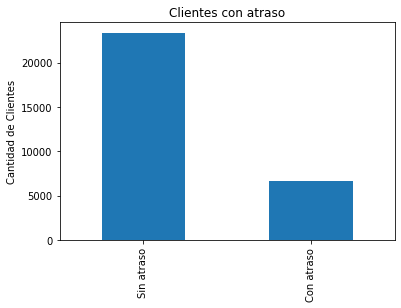

In [121]:
dataplot = newData["default payment next month"].value_counts()
dataplot = dataplot.plot(kind='bar')
dataplot.set_ylabel('Cantidad de Clientes')
dataplot.set_title('Clientes con atraso')
dataplot.set_xticklabels( ('Sin atraso', 'Con atraso') )

In [122]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int

In [123]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


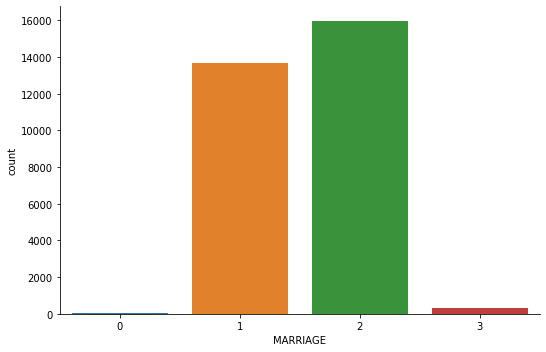

In [125]:
import seaborn as sns
marriageplot = sns.factorplot('MARRIAGE', data = rawData, kind = "count", aspect = 1.5)

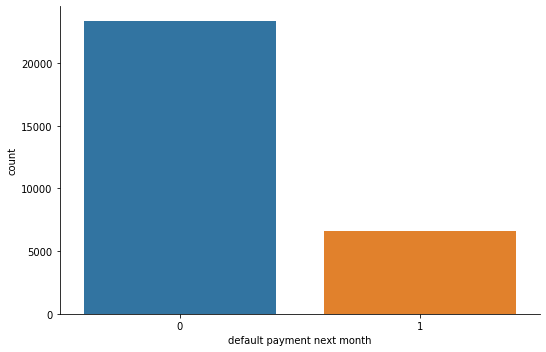

In [126]:
defaultplot = sns.factorplot('default payment next month', data = rawData, kind = "count", aspect = 1.5)

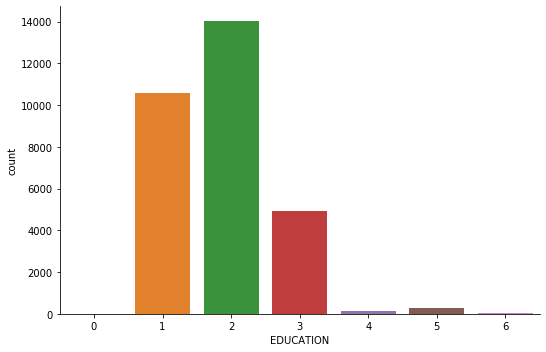

In [127]:
educationtplot = sns.factorplot('EDUCATION', data = rawData, kind = "count", aspect = 1.5)

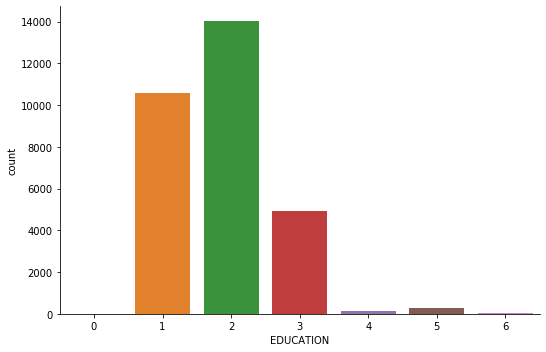

In [128]:
educationtplot = sns.factorplot('EDUCATION', data = newData, kind = "count", aspect = 1.5)

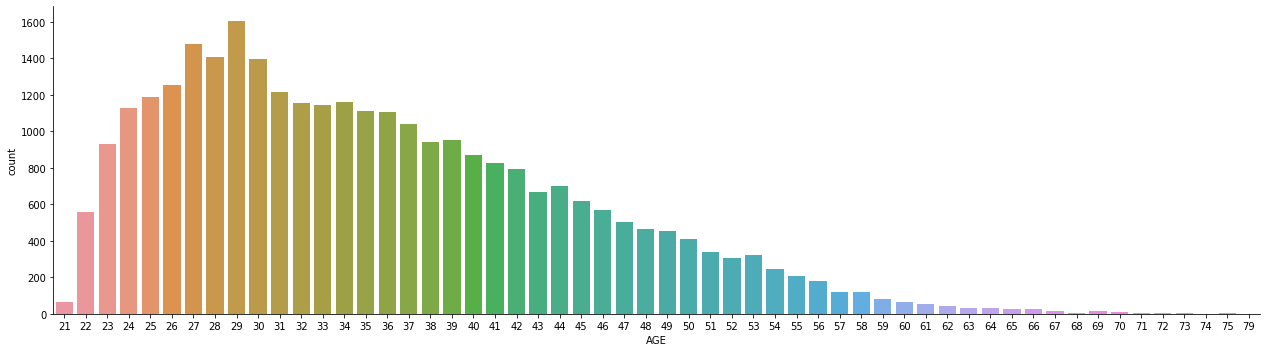

In [130]:
ageplot = sns.factorplot('AGE', data = newData, kind = "count", aspect = 3.5)

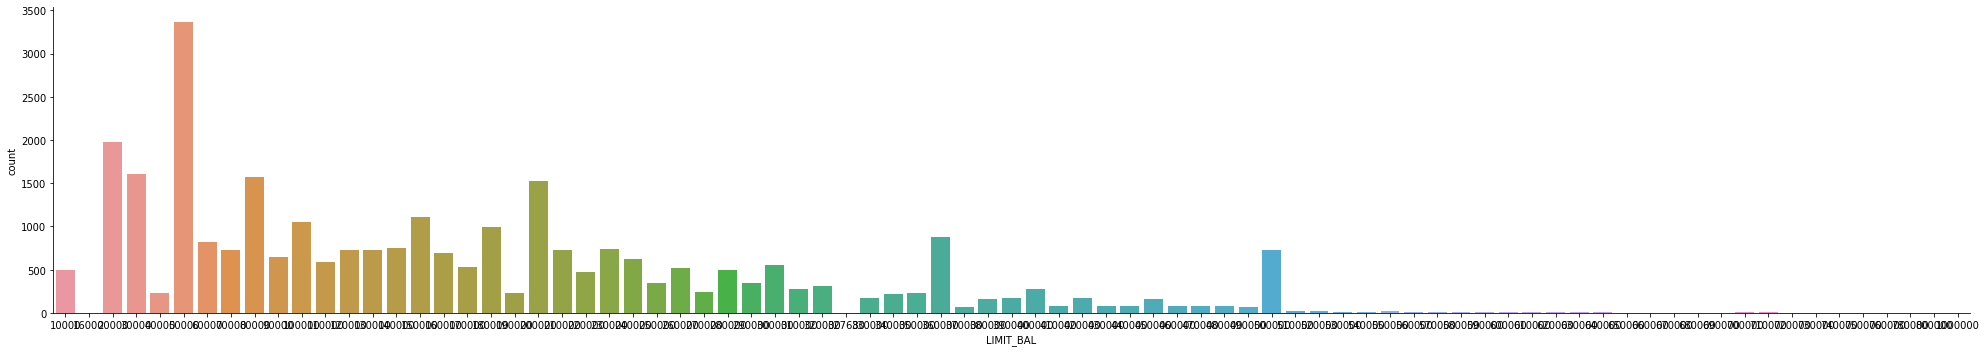

In [135]:
limitplot = sns.factorplot('LIMIT_BAL', data = newData, kind = "count", aspect = 5.5)

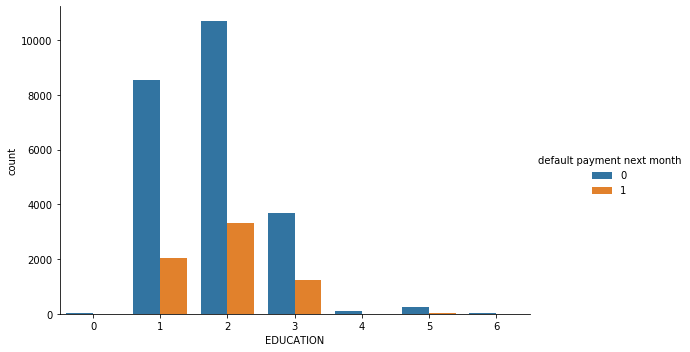

In [137]:
educdefault = sns.factorplot('EDUCATION', data=rawData, hue='default payment next month', kind='count', aspect=1.5)

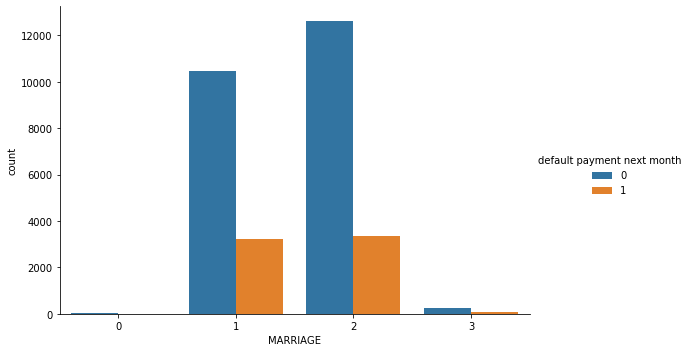

In [138]:
marriagedefault = sns.factorplot('MARRIAGE', data=rawData, hue='default payment next month', kind='count', aspect=1.5)